In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
delivary_time1=pd.read_csv("delivery_time.csv")

In [3]:
# chaking shape of the data
delivary_time1.shape

(21, 2)

In [4]:
# chaking null values
delivary_time1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
# chaking the data
delivary_time1.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [6]:
#Describing the data
delivary_time1.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


C:\Users\Aniket Mali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


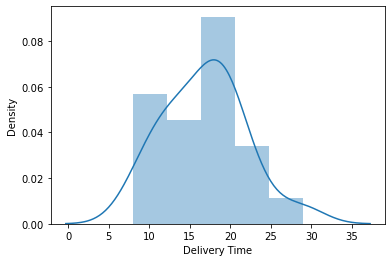

In [7]:
#no null value so go further for outliers chaking by using box plot and histogram
sns.distplot(delivary_time1['Delivery Time'])
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

<AxesSubplot:xlabel='Delivery Time'>

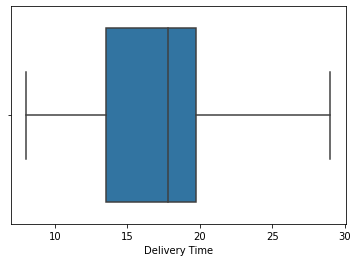

In [8]:
## plotting boxplot for outlier detection
sns.boxplot(delivary_time1['Delivery Time'])

In [9]:
## using log transform for normal distribution
delivary_time2=np.log(delivary_time1['Delivery Time'])

<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

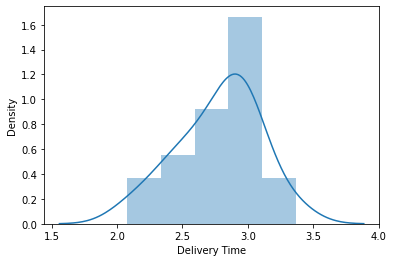

In [10]:
sns.distplot(delivary_time2)

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

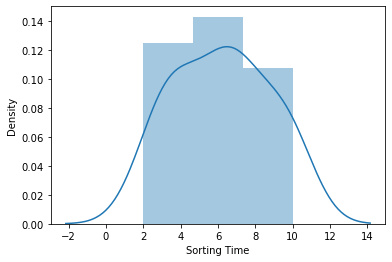

In [11]:
## chaking for feature
sns.distplot(delivary_time1['Sorting Time'])

<AxesSubplot:xlabel='Sorting Time'>

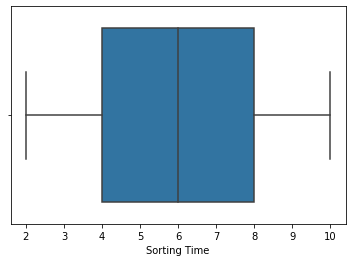

In [12]:
## Box plot
sns.boxplot(delivary_time1['Sorting Time'])

In [13]:
# Following the regression equation, our dependent variable (y) is the delivery Time
y = delivary_time1 ['Delivery Time']
# Similarly, our independent variable (x) is the Sorting Time
x1 = delivary_time1 ['Sorting Time']

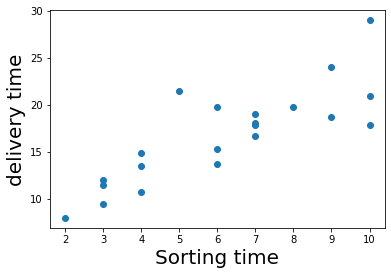

In [14]:
# Plot a scatter plot (first we put the horizontal axis, then the vertical axis)
plt.scatter(x1,y)
# Name the axes
plt.xlabel('Sorting time', fontsize = 20)
plt.ylabel('delivery time', fontsize = 20)
# Show the plot
plt.show()

In [15]:
import statsmodels.api as sms

In [16]:
#add constant as 1
sms.add_constant(x1)

,const,Sorting Time
0,1.0,10
1,1.0,4
2,1.0,6
3,1.0,9
4,1.0,10
5,1.0,6
6,1.0,7
7,1.0,3
8,1.0,10
9,1.0,9


In [17]:
# Add a constant. Essentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sms.add_constant(x1)
# Fitting tje model with dependent variable y & independent variable x
results = sms.OLS(y,x).fit()

In [18]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           3.98e-06
Time:                        14:20:33   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.5827      1.722      3.823      0.001       2.979      10.186
Sorting Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## From above table
## R-squared & adj-Rsquared not shows diffrence sorting score is an important function
## our null hypothesis is B0=0,B1=0
## resulted t values is less than 0.05 so our feature & constant is more important

In [19]:
%matplotlib notebook

<IPython.core.display.Javascript object>


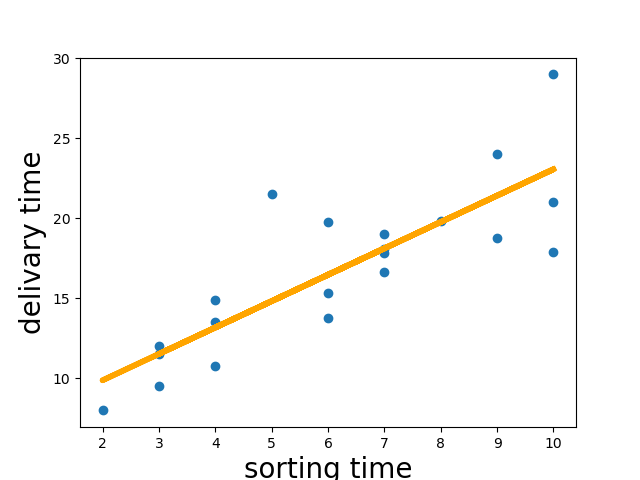

In [20]:
# Create a scatter plot
plt.scatter(x1,y)
# Define the regression equation, so we can plot it later
yhat = 1.6490*x1 +6.5827
# Plot the regression line against the independent variable (SAT)
fig = plt.plot(x1,yhat, lw=4, c='orange', label ='regression line')
# Label the axes
plt.xlabel('sorting time', fontsize = 20)
plt.ylabel('delivary time', fontsize = 20)
plt.show()

In [21]:
## checking our predictions
yhat

0     23.0727
1     13.1787
2     16.4767
3     21.4237
4     23.0727
5     16.4767
6     18.1257
7     11.5297
8     23.0727
9     21.4237
10    19.7747
11    13.1787
12    18.1257
13    11.5297
14    11.5297
15    13.1787
16    16.4767
17    18.1257
18     9.8807
19    18.1257
20    14.8277
Name: Sorting Time, dtype: float64

In [22]:
#Predict for 15 and 17 sorting time
newdata=pd.Series([15,17])

In [24]:
data_pred=pd.DataFrame(newdata,columns=['Sorting Time'])

In [24]:
data_pred

,Sorting Time
0,15
1,17
